# Training a simple CV model from scratch for Classify Clothing Articles in TensorFlow

Goal is to refresh tf knowledge
## Load Data and Librairies

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.12.0


In [4]:
dataset = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Text(0.5, 1.0, '3')

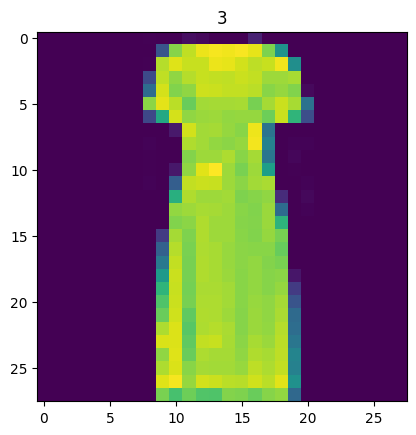

In [16]:
idx = 50
plt.imshow(training_images[idx])
plt.title(training_labels[idx])

In [20]:
# Normalize
training_images = training_images / 255.0
test_images = test_images / 255.0

## Define Model

Super simple, 3 layers
Flatten (28*28,) > 128 neurons w. relu > 10 (classes to predict) w. softmax

- `Sequential` defines a sequence of layers in the neural network.
- `Flatten` takes a square and turns it into a one-dimensional vector.
- `Dense` adds a layer of neurons.
- Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
  - `Relu` effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
  - `Softmax` takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

In [51]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                            ])

## Build & Train Model

Add a loss fn, an optimizer

Sparse categorical cross entropy works when labels are int values like here, while categorical cross entropy works with one hot encoded categories.

In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', #categorical_cross_entropy works with one hot encoding
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


ValueError: ignored

## Evaluate Model

No overfitting, quite similar accuracy on unseen images

In [42]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.4898 - accuracy: 0.8254


[0.48982173204421997, 0.8253999948501587]

## Classify & further exercises

In [43]:
classifications = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step
[5.5213604e-07 3.6085670e-08 4.6526429e-06 4.1550084e-06 1.0113087e-05
 1.5773974e-01 1.4980022e-05 3.8564691e-01 4.6532978e-03 4.5192549e-01]


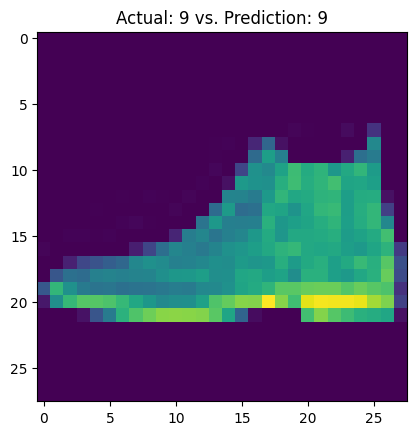

In [50]:
idx = 0
plt.imshow(test_images[idx])
plt.title(f'Actual: {test_labels[idx]} vs. Prediction: {tf.math.argmax(classifications[idx])}')
plt.show()

## Experimenting with more neurons in hidden layer

In the first execution of the cell, moving from 128 to 512 neurons in the hidden layer landed us an increase of 2.2% accuracy, for 170% more training time(!)

Moving to 1024 increased the accuracy by 3% compared to 128, coupled with a 400% increase in training time.

In [57]:
def define_train_model(n_neurons=128, epochs=5):

  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(n_neurons, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.fit(training_images, training_labels, epochs=epochs)
  return model

In [58]:
trained_model_128=define_train_model()

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 1.0757 - accuracy: 0.6667
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6351 - accuracy: 0.7712
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5607 - accuracy: 0.8008
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5185 - accuracy: 0.8169
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4914 - accuracy: 0.8275


In [59]:
trained_model_512=define_train_model(n_neurons=512)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8738 - accuracy: 0.7113
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5480 - accuracy: 0.8043
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4889 - accuracy: 0.8270
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4573 - accuracy: 0.8387
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4373 - accuracy: 0.8457


In [60]:
trained_model_1024=define_train_model(n_neurons=1024)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.7993 - accuracy: 0.7301
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.5134 - accuracy: 0.8177
Epoch 3/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4620 - accuracy: 0.8360
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4344 - accuracy: 0.8463
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4151 - accuracy: 0.8524


## Testing adding one more layer
Adding one layer didn't change the training time, but increased the accuracy by 2%

In [ ]:
# Quick tweak of above function here
def define_train_model(n_neurons=128, epochs=5, additional_layer=False, callbacks=None):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(n_neurons, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  if additional_layer:
      model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(n_neurons, activation=tf.nn.relu),
      tf.keras.layers.Dense(n_neurons, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.fit(training_images, training_labels, epochs=epochs, callbacks=callbacks)
  return model

In [63]:
trained_model_add_layer = define_train_model(additional_layer=True)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8358 - accuracy: 0.6960
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5568 - accuracy: 0.7976
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4993 - accuracy: 0.8194
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4588 - accuracy: 0.8348
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4325 - accuracy: 0.8443


## Skipping normalization
Slightly lower accuracy w. initial model without normalization, similar accuracy when adding one more layer.

I expect normalization to have a bigger impact on accuracy when dealing with features of different magnitudes.

In [ ]:
dataset = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = dataset.load_data()
no_norm_model = define_train_model()

In [65]:
dataset = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = dataset.load_data()
no_norm_model = define_train_model(additional_layer=True)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 1.9105 - accuracy: 0.7467
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5779 - accuracy: 0.8064
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5405 - accuracy: 0.8140
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4770 - accuracy: 0.8339
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4438 - accuracy: 0.8440


## Callbacks

In [73]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()
dataset = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = dataset.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model_w_callbacks = define_train_model(epochs=20, callbacks=[callbacks])


Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4968 - accuracy: 0.8251
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3731 - accuracy: 0.8650
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3353 - accuracy: 0.8784
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3095 - accuracy: 0.8851
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2933 - accuracy: 0.8918
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2797 - accuracy: 0.8953
Epoch 7/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.2670 - accuracy: 0.9022
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2670 - accuracy: 0.9022
